In [1]:
import pickle
from matplotlib import pyplot as plt
import random
import datetime
import numpy as np

In [2]:
with open('../data/twitter/election_dataset_raw.pickle', 'rb') as handle:
    twitter = pickle.load(handle)
biden, trump = twitter['biden'], twitter['trump']

In [3]:

def count_entries(dataset, timeframe='hours', log=False):
    timefactor = 1 if timeframe == 'hours' else 24
    counts = []
    min_date = min([x[0] for x in dataset])
    max_date = max([x[0] for x in dataset])
    for each in range((max_date - min_date).days*(24 if timeframe == 'hours' else 1)):
        d = min_date + datetime.timedelta(hours=each*timefactor)
        l = len([x for x in dataset if x[0] > d and x[0] < d + datetime.timedelta(hours=timefactor)])
        if log and l > 0:
            counts.append(np.log(l))
        else:
            counts.append(l)
    return counts

In [4]:
d_set = biden+trump
d_counts = count_entries(d_set, timeframe='days')
h_conts = count_entries(d_set)

days = (max([x[0] for x in d_set]) - min([x[0] for x in d_set])).days
hours = days*24
l = [(min([x[0] for x in d_set]) + datetime.timedelta(days=y-1)).date() for y in range(days)]


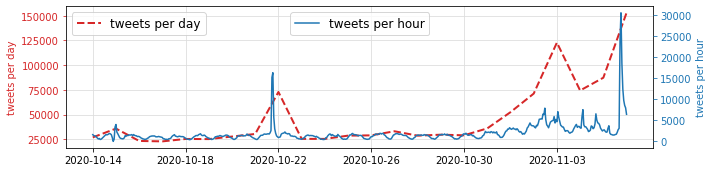

In [64]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)


plt.sca(ax)
plt.plot(d_counts, color='tab:red', label="tweets per day", linestyle='--', linewidth=2)
plt.legend(loc="upper left", fontsize="large")
plt.xticks(ticks=range(0, days)[::4], labels=l[::4])
ax.set_ylabel("tweets per day", color="tab:red")
ax.tick_params(axis='y', colors="tab:red")
ax.grid(color='#dddddd')
#ax.set_xlim([-0.03, ylim_top])
#ax.yaxis.set_tick_params(weight="bold")
#ax.xaxis.set_tick_params(labelsize=11)

plt.sca(ax2)
plt.plot(h_conts, color="tab:blue", label="tweets per hour")
plt.legend(loc="upper center", fontsize="large")
ax2.yaxis.tick_right()
ax2.set_ylabel("tweets per hour", color="tab:blue")
ax2.tick_params(axis='y', colors="tab:blue")
ax2.yaxis.set_label_position('right') 
plt.xticks([])#ticks=range(0, hours)[::4*25], labels=l[::4], rotation=20)

fig.set_size_inches(10, 2.5)
fig.tight_layout()
plt.savefig('../data/twitter/tweet_counts.pdf', format='pdf')
plt.show()


In [26]:
print(l[::4])

[datetime.date(2020, 10, 14), datetime.date(2020, 10, 18), datetime.date(2020, 10, 22), datetime.date(2020, 10, 26), datetime.date(2020, 10, 30), datetime.date(2020, 11, 3)]


In [6]:
print(h_conts)

[1590, 1396, 1294, 1255, 1004, 780, 572, 693, 452, 521, 708, 933, 1158, 1377, 1583, 1550, 1592, 1738, 1886, 1782, 1585, 922, 2, 476, 3401, 4000, 2196, 1797, 1329, 906, 723, 653, 603, 639, 856, 1387, 1236, 1414, 1389, 1563, 1469, 1538, 1608, 1333, 1621, 1423, 1355, 1324, 1141, 1185, 1140, 994, 809, 718, 588, 554, 466, 513, 557, 761, 822, 1089, 1175, 1226, 1296, 1257, 1313, 1225, 1078, 1081, 1102, 1174, 1096, 1051, 995, 911, 596, 621, 481, 501, 462, 456, 629, 647, 731, 1074, 1310, 1453, 1593, 1245, 1201, 1083, 1128, 1241, 1199, 1127, 1119, 1127, 1052, 873, 749, 582, 541, 505, 405, 437, 514, 716, 884, 1085, 1204, 1374, 1388, 1359, 1599, 1679, 1811, 1509, 1374, 1381, 1503, 1367, 1115, 1002, 799, 831, 586, 613, 438, 507, 618, 795, 1095, 1098, 1211, 1207, 1261, 1396, 1293, 1246, 1141, 1231, 1326, 1467, 1494, 1456, 1346, 1143, 929, 869, 743, 575, 462, 497, 679, 820, 1208, 1362, 1270, 1339, 1434, 1428, 1290, 1327, 1300, 1396, 1719, 1621, 1401, 1473, 1257, 1079, 915, 818, 710, 579, 480, 445, 64

In [8]:
print(d_counts)

[26889, 35801, 23293, 22859, 25298, 25175, 27737, 30357, 72869, 25395, 25360, 28670, 28944, 33088, 28638, 29629, 29010, 36004, 52422, 71203, 122837, 74368, 87297, 152968]
